# Telecom Churn Prediction
**Author:** Shivakumar Ravichandran

# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

# 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [1]:
#Data Structures
import pandas as pd
import re

#missingno
import missingno as msno

#sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

#matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Next, we load our datasets and the data dictionary file.

The **train.csv** file contains both dependent and independent features, while the **test.csv** contains only the independent variables. 

So, for model selection, I will create our own train/test dataset from the **train.csv** and use the model to predict the solution using the features in unseen test.csv data for submission.

In [2]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")

print(data.shape)
print(unseen.shape)

(69999, 172)
(30000, 171)


In [3]:
unseen = pd.read_csv("test.csv")

In [4]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [6]:
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [7]:
pd.options.display.max_seq_items = 5000

In [8]:
print(data.columns)

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8

In [9]:
categorical_var = []
numerical_var = []
for i in data.columns:
    categorical_var.append(i) if data[i].dtype == 'object' else numerical_var.append(i)

print("No of categorical variables are: {}".format(len(categorical_var)))
print("No of numerical variables are: {}".format(len(numerical_var)))
        

No of categorical variables are: 9
No of numerical variables are: 163


In [10]:
data[categorical_var]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


# EDA

First, look for null values in categorical data 

In [11]:
data[categorical_var].isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
date_of_last_rech_6          1101
date_of_last_rech_7          1234
date_of_last_rech_8          2461
date_of_last_rech_data_6    52431
date_of_last_rech_data_7    52134
date_of_last_rech_data_8    51582
dtype: int64

Look the number of null values by it's percentage, so it's easy to visualize the volume and compare the data

In [12]:
round(data[categorical_var].isnull().sum()/len(data[categorical_var].index) * 100, 2).sort_values(ascending=False)

date_of_last_rech_data_6    74.90
date_of_last_rech_data_7    74.48
date_of_last_rech_data_8    73.69
date_of_last_rech_8          3.52
date_of_last_rech_7          1.76
date_of_last_rech_6          1.57
last_date_of_month_8         1.05
last_date_of_month_7         0.57
last_date_of_month_6         0.00
dtype: float64

Clearly, we have seen that, Columns data_of_last_rech_data_6, data_of_last_rech_data_7, data_of_last_rech_data_8 are having more than 73% of missing values or null values, so we have remove those columns from the data set.

In [13]:
data.drop(columns=['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis='columns', inplace=True)

Now, Let look at some more categorical variable values 

In [14]:
print(data['last_date_of_month_6'].unique())
print(data['last_date_of_month_7'].unique())
print(data['last_date_of_month_8'].unique())

['6/30/2014']
['7/31/2014' nan]
['8/31/2014' nan]


Here we have the clarity of unique values in these columns, this will not help in clasification, so we will remove these columns from dataset.

In [15]:
data.drop(columns=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], axis='columns', inplace=True)
data.shape

(69999, 166)

Again, Let's look at some more categorical variable values 

In [16]:
print(data['date_of_last_rech_6'].unique())
print(data['date_of_last_rech_7'].unique())
print(data['date_of_last_rech_8'].unique())

['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014'
 '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014'
 '6/23/2014' '6/24/2014' '6/14/2014' nan '6/5/2014' '6/8/2014' '6/6/2014'
 '6/16/2014' '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/10/2014'
 '6/7/2014' '6/2/2014' '6/1/2014' '6/3/2014' '6/9/2014' '6/4/2014']
['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014'
 '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014'
 '7/28/2014' nan '7/7/2014' '7/18/2014' '7/13/2014' '7/17/2014'
 '7/12/2014' '7/24/2014' '7/15/2014' '7/1/2014' '7/23/2014' '7/9/2014'
 '7/8/2014' '7/14/2014' '7/5/2014' '7/4/2014' '7/11/2014' '7/6/2014'
 '7/2/2014' '7/3/2014']
['8/24/2014' '8/26/2014' '8/25/2014' '8/30/2014' '8/28/2014' '8/19/2014'
 '8/5/2014' '8/27/2014' '8/16/2014' '8/21/2014' '8/22/2014' '8/23/2014'
 nan '8/15/2014' '8/31/2014' '8/12/2014' '8/10/2014' '8/29/2014'
 '8/20/2014' '8/13/2014' '8/18/2014' '8/11/2014' '8/14/

Here we can see these categorical variables are nothing but the date field and having last recharge date of the individual user on the month Jun, July, Aug month on the year 2014.
We can break down these column values as bellow.
- Months are represented from the column name itself
- Year is common.
- Only unique value is date, so we can extract the date value alone by making these these variable become numerical field.

In [17]:
data['last_rech_6'] = pd.DatetimeIndex(data=data['date_of_last_rech_6']).day
data['last_rech_7'] = pd.DatetimeIndex(data=data['date_of_last_rech_7']).day
data['last_rech_8'] = pd.DatetimeIndex(data=data['date_of_last_rech_8']).day

In [18]:
data.drop(columns=['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis='columns', inplace=True)
data.shape

(69999, 166)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 166 entries, id to last_rech_8
dtypes: float64(138), int64(28)
memory usage: 88.7 MB


Now, we don't have any categorical data in our dataset. and we have 166 numerical columns.

In [20]:
data.nunique().sort_values(ascending=True).head(20)

std_ic_t2o_mou_7     1
std_og_t2c_mou_7     1
std_ic_t2o_mou_8     1
std_og_t2c_mou_6     1
std_ic_t2o_mou_6     1
std_og_t2c_mou_8     1
std_og_t2o_mou       1
loc_ic_t2o_mou       1
loc_og_t2o_mou       1
circle_id            1
churn_probability    2
fb_user_8            2
fb_user_7            2
fb_user_6            2
night_pck_user_7     2
night_pck_user_6     2
night_pck_user_8     2
monthly_2g_6         5
monthly_2g_7         6
monthly_2g_8         6
dtype: int64

From the above output, we can see that, few columns having only one values and few columns having only 2 values. we will inspect those columns and drop if required.

In [21]:
col_val_1 = data.nunique().sort_values(ascending=True)[data.nunique().sort_values(ascending=True) == 1].index
data.drop(columns=col_val_1, axis='columns', inplace=True)

Then, Inspet the columns having only two values

In [22]:
col_val_2 = data.nunique().sort_values(ascending=True)[data.nunique().sort_values(ascending=True) == 2].index
data[col_val_2]

,churn_probability,night_pck_user_8,fb_user_8,fb_user_7,fb_user_6,night_pck_user_7,night_pck_user_6
0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,NaN,1.0,NaN,0.0,NaN
2,0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
69994,0,0.0,1.0,1.0,NaN,0.0,NaN
69995,0,NaN,NaN,NaN,NaN,NaN,NaN
69996,0,NaN,NaN,NaN,NaN,NaN,NaN
69997,0,0.0,1.0,1.0,1.0,0.0,0.0


Night Pack Users and FB users columns having only two values are mostly like Yes/No (1 or 0) values. For now, we are not going to take any decision based on these info, we will look correlation and do the PCA to take decision on these columns.

In [23]:
data.shape

(69999, 156)

In [24]:
data.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_

<Axes: xlabel='total_rech_num_6', ylabel='total_og_mou_6'>

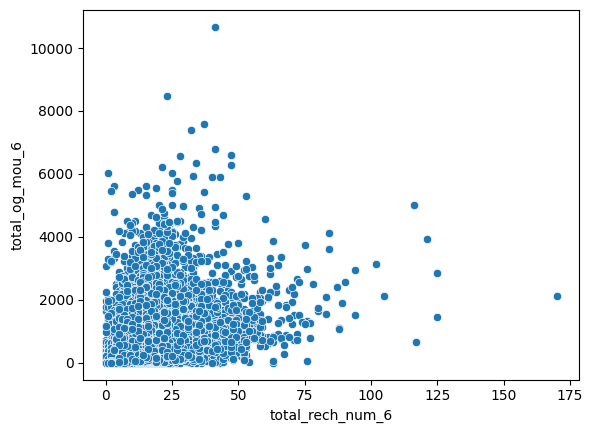

In [25]:
sns.scatterplot(data=data, x='total_rech_num_6', y='total_og_mou_6')

<Axes: xlabel='total_rech_num_6', ylabel='monthly_2g_6'>

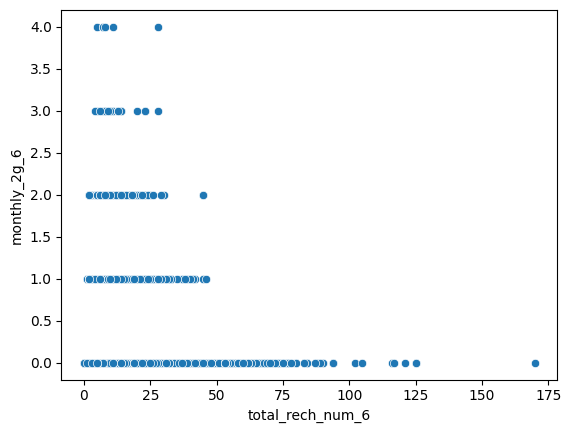

In [26]:
sns.scatterplot(data=data, x='total_rech_num_6', y='monthly_2g_6')

<Axes: xlabel='total_og_mou_6', ylabel='monthly_2g_6'>

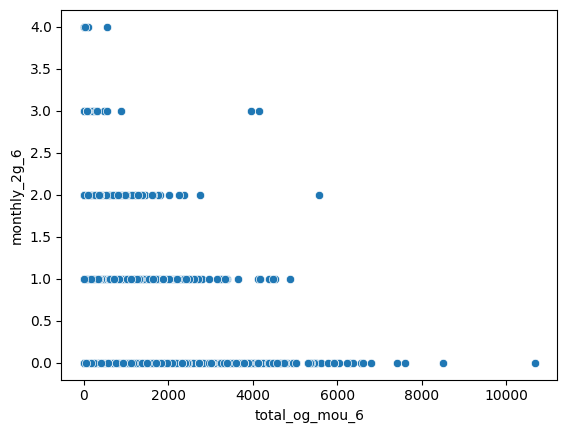

In [27]:
sns.scatterplot(data=data, x='total_og_mou_6', y='monthly_2g_6')

<Axes: >

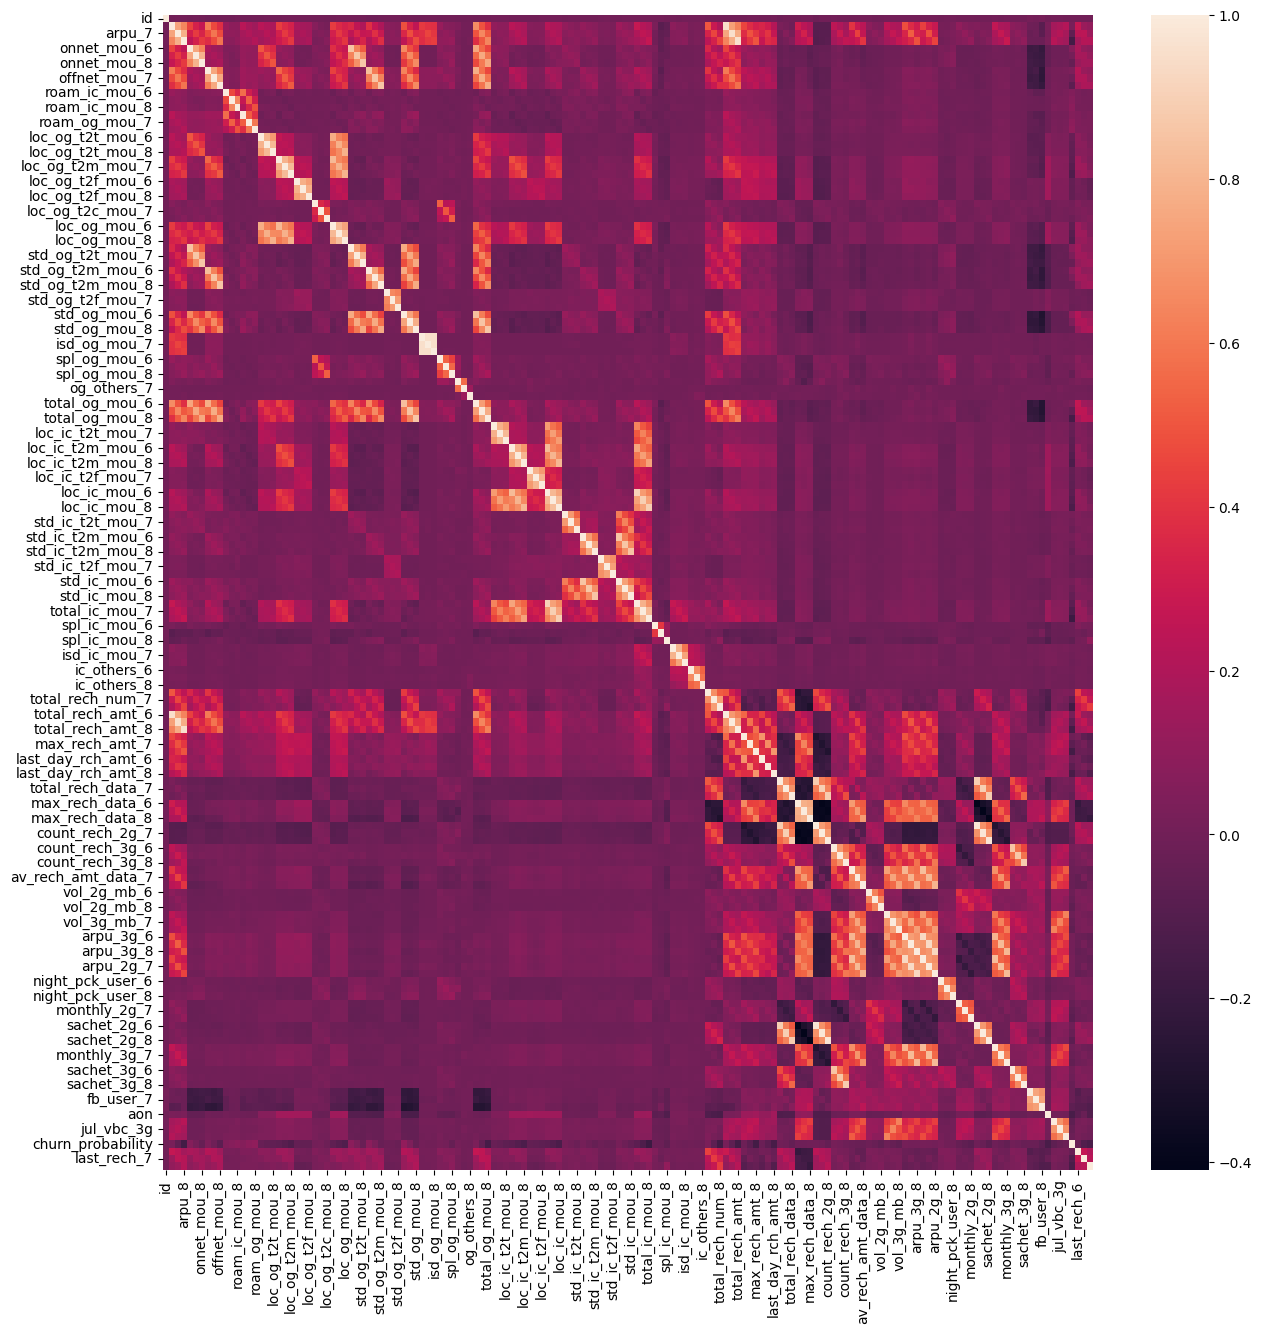

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr())

# Handling Missing Values

Now, It's time to check the null values on the numerical variables. for that we are going to use the library called missingno. The matrix chart helps to identify the number of null values in the dataset very easily.

<Axes: >

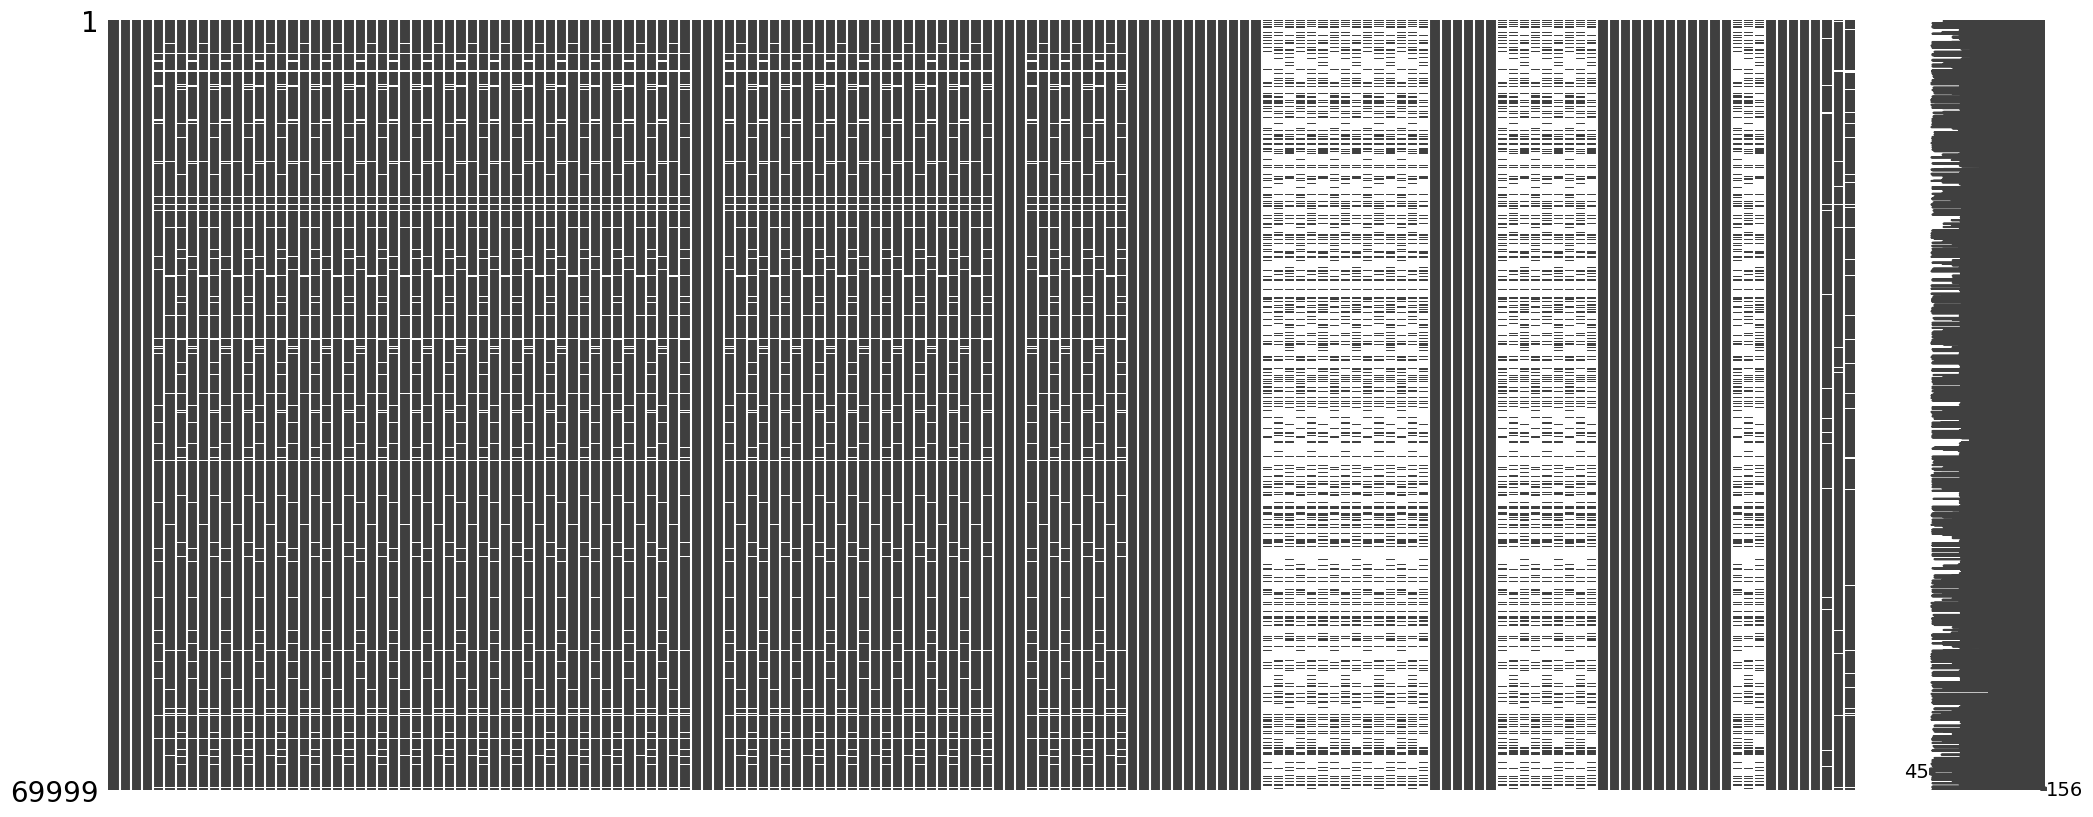

In [29]:
msno.matrix(data)

From this graph, we clearly see that there are few columns having more null values. Now let's look the null values by it's percentage.

Let's find out the columns having more null values (Let's say more than 50%) and drop those if any

In [30]:
col_more_50_null_val = round(data.isnull().sum().sort_values(ascending=False)/len(data.index)*100,2)[round(data.isnull().sum().sort_values(ascending=False)/len(data.index)*100,2) > 50.0].index

In [31]:
data.drop(col_more_50_null_val, axis='columns', inplace=True)
data.shape

(69999, 129)

Let's look the matrix again

<Axes: >

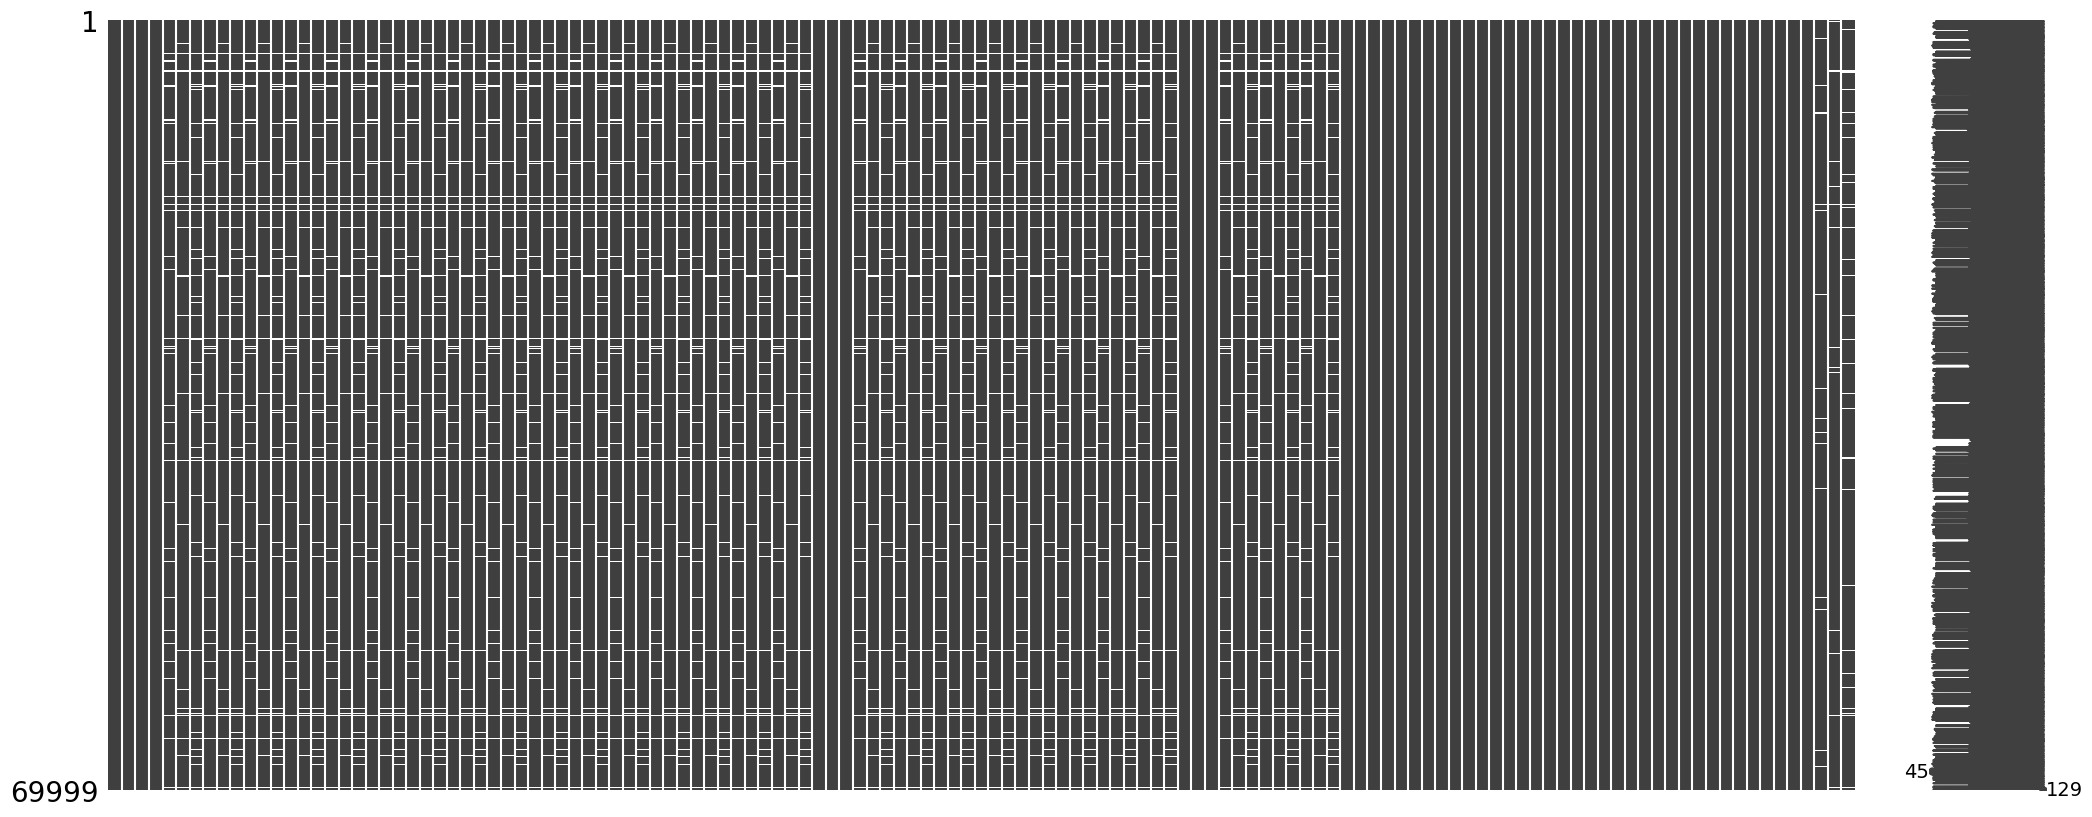

In [32]:
msno.matrix(data)

Now, we have few columns having less number of missing values. Those missing values are replaceable by some values.

Now, we will use the MICE (Multiple Imputation by Chained Equations) method to fill the missing values.

In [33]:
# Initialize the random forest regressor for the MICE algo
# random_regressor = RandomForestRegressor(random_state=100, n_jobs=-1)
# imputer = IterativeImputer(random_state=100)
imputer = SimpleImputer(strategy='constant', fill_value=0)

In [34]:
# Pick the columns having more than 0 null values, those columns have to replace with some values using MICE method.
col_more_0_null_val = round(data.isnull().sum().sort_values(ascending=False)/len(data.index)*100,2)[round(data.isnull().sum().sort_values(ascending=False)/len(data.index)*100,2) > 0.0].index
col_more_0_null_val

Index(['std_og_t2f_mou_8', 'loc_og_mou_8', 'isd_ic_mou_8', 'loc_og_t2c_mou_8',
       'loc_ic_t2t_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_mou_8',
       'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8',
       'roam_og_mou_8', 'std_ic_t2t_mou_8', 'roam_ic_mou_8',
       'std_og_t2m_mou_8', 'std_ic_t2m_mou_8', 'offnet_mou_8', 'isd_og_mou_8',
       'std_ic_t2f_mou_8', 'onnet_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'ic_others_8', 'og_others_8', 'spl_og_mou_6', 'isd_og_mou_6',
       'og_others_6', 'loc_ic_mou_6', 'ic_others_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'loc_ic_t2f_mou_6', 'std_og_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'spl_ic_mou_6', 'loc_og_t2f_mou_6', 'roam_og_mou_6',
       'loc_og_t2c_mou_6', 'roam_ic_mou_6', 'loc_og_t2t_mou_6', 'offnet

In [35]:
df_null_train = data.loc[:, col_more_0_null_val]
df_null_train.shape

(69999, 84)

In [36]:
# Fit on the dataset
imputer.fit(df_null_train)

SimpleImputer(fill_value=0, strategy='constant')

In [37]:
# Transform the model to the dataset.
df_null_imputed = imputer.transform(df_null_train)

In [38]:
# Assign the computed value to respective columns
data.loc[:, col_more_0_null_val] = df_null_imputed

Cross Check the null values in the dataset.

In [39]:
round(data.isnull().sum().sort_values(ascending=False)/len(data.index)*100,2)[round(data.isnull().sum().sort_values(ascending=False)/len(data.index)*100,2) > 0.0].index

Index([], dtype='object')

Now, Out dataset it NULL FREE dataset.

# Data Imbalancing

In [40]:
round(data['churn_probability'].value_counts()/len(data.index) * 100, 2)

0    89.81
1    10.19
Name: churn_probability, dtype: float64

It was a clear statement, the data set is purly imbalanced. we have almost 89% of NOT Churn data in the dataset and only 10% Churn data.
- By splitting the data into train and test set, will again lead to data imbalance and reduce the model accuracy so we have to use train-validate-test split like cross-validation method.

# Feature Engineering

In [41]:
data.shape

(69999, 129)

In [42]:
data.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_

Still, we have more number of features present in our dataset, which will lead to the complex model. to remove some features let's visualize the data and try to remove some features as possible.

<Axes: >

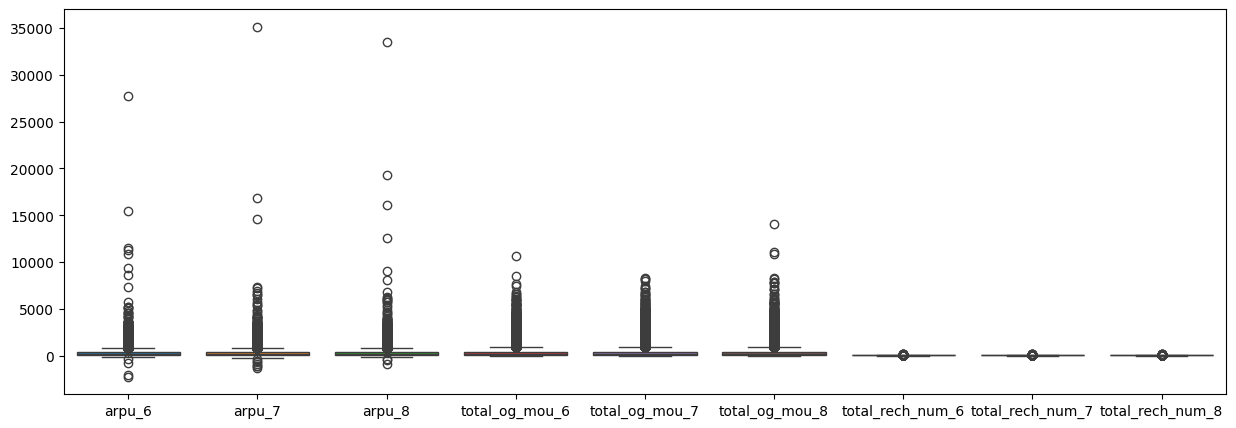

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data[['arpu_6', 'arpu_7', 'arpu_8','total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8']])

## Outlier Treatment

In [44]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [45]:
out_cols = ['arpu_6', 'arpu_7', 'arpu_8','total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8']

In [46]:
data = data.apply(cap_outliers, axis=0)

<Axes: >

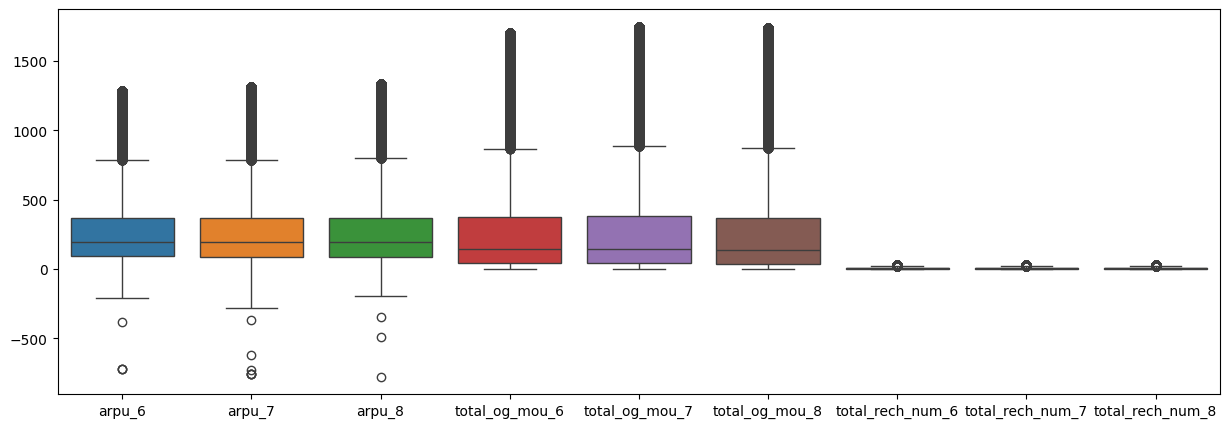

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data[out_cols])

Now, we have some decent data and some outlier values are replaced by upper and lower limit vales from the respective columns.

In [48]:
data.shape

(69999, 129)

## Train Test Split

In [49]:
y = data.pop("churn_probability")
X = data
print(X.shape)
print(y.shape)

(69999, 128)
(69999,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48999, 128)
(21000, 128)
(48999,)
(21000,)


Let's check the data split on class imbalancing on train and test data.

In [51]:
print("Data Imbalancing check on y train")
print(round(y_train.value_counts()/len(y_train) * 100, 2))
print("Data Imbalancing check on y test")
print(round(y_test.value_counts()/len(y_test) * 100, 2))

Data Imbalancing check on y train
0    89.77
1    10.23
Name: churn_probability, dtype: float64
Data Imbalancing check on y test
0    89.9
1    10.1
Name: churn_probability, dtype: float64


## Feature Scaling

In [52]:
X_train.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,last_rech_6,last_rech_7,last_rech_8
count,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,...,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000
mean,35057.132635,276.694584,270.941593,271.764148,115.216996,115.494056,113.199097,179.913605,177.561052,174.858600,...,0.050238,0.052649,0.056233,1222.385542,55.053551,52.709284,47.751979,23.810723,25.178110,24.627350
std,20228.071339,263.861801,265.303655,269.363155,208.670340,214.178472,211.324096,240.697706,242.800941,240.558743,...,0.253338,0.273170,0.289213,953.488037,172.828807,170.311462,158.173532,6.574922,6.273482,7.410972
min,0.000000,-719.507388,-754.914870,-491.545000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,3.389175,5.173469,1.709330
25%,17522.500000,94.356500,86.695000,84.551500,5.480000,4.860000,4.080000,28.960000,26.660000,23.780000,...,0.000000,0.000000,0.000000,466.000000,0.000000,0.000000,0.000000,20.000000,23.000000,24.000000
50%,35147.000000,198.031000,191.321000,193.046000,31.090000,29.210000,28.080000,90.110000,85.460000,83.390000,...,0.000000,0.000000,0.000000,871.000000,0.000000,0.000000,0.000000,27.000000,27.000000,27.000000
75%,52618.500000,372.177500,366.007000,371.377500,113.930000,109.930000,108.090000,224.450000,218.935000,217.070000,...,0.000000,0.000000,0.000000,1820.000000,0.000000,0.000000,0.000000,29.000000,30.000000,30.000000
max,69998.000000,1285.776117,1311.286693,1334.631771,1013.234431,1047.733766,1040.915263,1129.712701,1145.063299,1141.507708,...,1.794354,1.985085,2.125593,4077.918672,876.094574,869.632930,831.757171,30.000000,31.000000,31.000000


In [53]:
# Scale all values in the train set except id column (which indicate id of the customer)
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train.loc[:, X_train.columns != 'id'])
X_test_scaled = scalar.transform(X_test.loc[:, X_test.columns != 'id'])

In [54]:
X_train.loc[:, X_train.columns != 'id'] = X_train_scaled
X_test.loc[:, X_test.columns != 'id'] = X_test_scaled

In [55]:
X_train.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,last_rech_6,last_rech_7,last_rech_8
count,48999.000000,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,...,4.899900e+04,4.899900e+04,48999.000000,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04
mean,35057.132635,2.610210e-17,3.248262e-17,8.236663e-17,1.232599e-18,-6.264505e-17,1.479119e-17,3.763053e-17,2.407194e-17,1.090488e-16,...,1.218098e-17,-1.508121e-17,0.000000,-9.947801e-17,6.090491e-17,-5.800467e-17,-3.074248e-17,1.540024e-16,-1.811196e-16,6.764795e-17
std,20228.071339,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000010e+00,1.000010e+00,1.000010,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,0.000000,-3.775507e+00,-3.866765e+00,-2.833784e+00,-5.521540e-01,-5.392476e-01,-5.356713e-01,-7.474747e-01,-7.313104e-01,-7.268927e-01,...,-1.983060e-01,-1.927356e-01,-0.194436,-1.093245e+00,-3.185471e-01,-3.094907e-01,-3.018992e-01,-3.106007e+00,-3.188794e+00,-3.092476e+00
25%,17522.500000,-6.910434e-01,-6.944815e-01,-6.950266e-01,-5.258923e-01,-5.165560e-01,-5.163643e-01,-6.271566e-01,-6.215074e-01,-6.280385e-01,...,-1.983060e-01,-1.927356e-01,-0.194436,-7.932908e-01,-3.185471e-01,-3.094907e-01,-3.018992e-01,-5.795905e-01,-3.471967e-01,-8.465237e-02
50%,35147.000000,-2.981272e-01,-3.001142e-01,-2.922410e-01,-4.031615e-01,-4.028647e-01,-4.027935e-01,-3.731009e-01,-3.793313e-01,-3.802378e-01,...,-1.983060e-01,-1.927356e-01,-0.194436,-3.685302e-01,-3.185471e-01,-3.094907e-01,-3.018992e-01,4.850718e-01,2.904143e-01,3.201570e-01
75%,52618.500000,3.618708e-01,3.583304e-01,3.698144e-01,-6.167665e-03,-2.597886e-02,-2.417684e-02,1.850323e-01,1.704045e-01,1.754741e-01,...,-1.983060e-01,-1.927356e-01,-0.194436,6.267730e-01,-3.185471e-01,-3.094907e-01,-3.018992e-01,7.892610e-01,7.686225e-01,7.249663e-01
max,69998.000000,3.824319e+00,3.921377e+00,3.945894e+00,4.303566e+00,4.352675e+00,4.390061e+00,3.946065e+00,3.984796e+00,4.018391e+00,...,6.884624e+00,7.074181e+00,7.155213,2.994859e+00,4.750651e+00,4.796694e+00,4.956665e+00,9.413556e-01,9.280252e-01,8.599028e-01


In [56]:
X_test.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,last_rech_6,last_rech_7,last_rech_8
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,34863.359952,-0.015002,-0.004449,-0.009331,-0.008593,-0.005085,-0.011452,-0.017706,-0.006526,-0.010314,...,0.012187,0.025362,0.006929,-0.006382,0.008586,0.002756,-0.002908,-0.000505,-0.010103,-0.008102
std,20157.962451,0.992425,0.994057,0.993140,0.996632,1.002472,0.995989,0.972089,0.988451,0.990636,...,1.039538,1.076546,1.014065,0.995442,1.014371,0.998105,0.993555,1.005384,0.998202,1.003016
min,2.000000,-3.775507,-3.866765,-3.893216,-0.552154,-0.539248,-0.535671,-0.747475,-0.731310,-0.726893,...,-0.198306,-0.192736,-0.194436,-1.093245,-0.318547,-0.309491,-0.301899,-3.106007,-3.188794,-3.092476
25%,17446.500000,-0.701634,-0.694285,-0.700795,-0.526803,-0.515856,-0.515891,-0.629172,-0.620776,-0.627935,...,-0.198306,-0.192736,-0.194436,-0.788047,-0.318547,-0.309491,-0.301899,-0.579590,-0.506599,-0.084652
50%,34619.500000,-0.305324,-0.295989,-0.300305,-0.407618,-0.403565,-0.405917,-0.377629,-0.377416,-0.385975,...,-0.198306,-0.192736,-0.194436,-0.379018,-0.318547,-0.309491,-0.301899,0.485072,0.290414,0.320157
75%,52223.250000,0.341523,0.349244,0.350597,-0.020688,-0.040885,-0.050949,0.172496,0.161477,0.164500,...,-0.198306,-0.192736,-0.194436,0.602651,-0.318547,-0.309491,-0.301899,0.789261,0.768622,0.724966
max,69997.000000,3.824319,3.921377,3.945894,4.303566,4.352675,4.390061,3.946065,3.984796,4.018391,...,6.884624,7.074181,7.155213,2.994859,4.750651,4.796694,4.956665,0.941356,0.928025,0.859903


In [57]:
# Let's set the ID column has index to the dataset.
X_train = X_train.set_index('id')

In [58]:
X_test = X_test.set_index("id")
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,last_rech_6,last_rech_7,last_rech_8
id,,,,,,,,,,,,,,,,,,,,,
22684,-0.349988,-0.581760,-0.667656,-0.516979,-0.513895,-0.482482,-0.107828,-0.414628,-0.407175,1.178714,...,-0.198306,-0.192736,-0.194436,-0.178699,-0.318547,-0.309491,-0.301899,-0.883780,-2.578835,-3.092476
56165,-0.384317,3.467980,2.560595,-0.088212,4.352675,4.390061,0.308757,3.984796,4.018391,-0.235921,...,-0.198306,-0.192736,-0.194436,-0.762876,-0.318547,-0.309491,-0.301899,0.789261,0.768622,0.455093
8774,-0.857308,-0.798495,-0.924814,-0.506915,-0.495685,-0.508509,-0.574310,-0.541812,-0.672103,-0.258859,...,-0.198306,-0.192736,-0.194436,0.475747,-0.318547,-0.309491,-0.301899,-0.427496,-1.144210,0.185221
34429,-0.307306,-0.186025,-0.415826,-0.353130,-0.359302,-0.314729,0.167749,0.166389,1.351997,-0.214487,...,-0.198306,-0.192736,-0.194436,-0.983122,-0.318547,-0.309491,-0.301899,-1.340064,-1.781821,0.455093
53653,-0.775621,-1.012207,0.157506,-0.515924,-0.537567,-0.505196,-0.615316,-0.466646,-0.307614,-0.258859,...,-0.198306,-0.192736,-0.194436,1.380854,-0.318547,-0.309491,-0.301899,-0.883780,-0.187794,0.185221


In [59]:
selected_cols = X_train.columns

In [60]:
selected_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_og_mou

## Dimentionality Reduction

Sice we have the higher dimention it will lead to the model complexity so we have to reduce the dimentions using PCA method.

In [61]:
rf_dr = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_dr.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [62]:
feature_importances = pd.DataFrame({'col':selected_cols, 'importance':rf_dr.feature_importances_})

<BarContainer object of 127 artists>

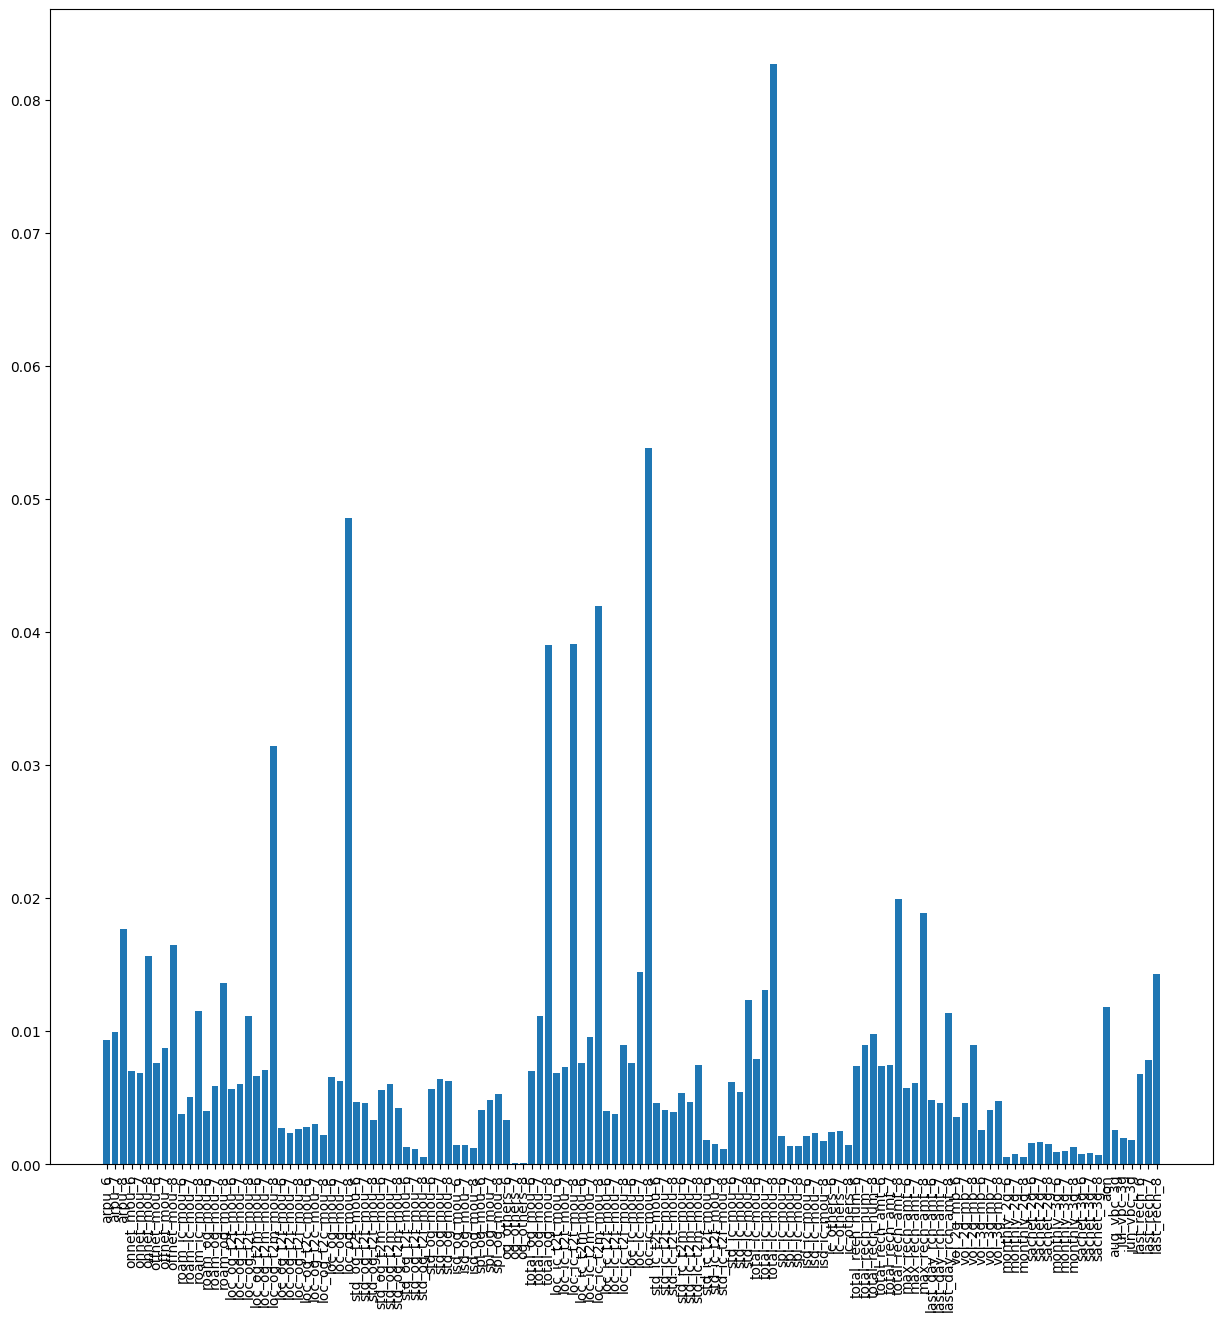

In [63]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
plt.bar(feature_importances['col'], feature_importances['importance'])

In [64]:
# Initialize PCA (Unsupervised method) which will select the variables describing 90% of infomation from the dataset.
pca = PCA()
# Since ID column is just we are using as an identifier, we are not having that column in feature selection.
X_train_pca = pca.fit_transform(X_train)

In [65]:
X_train_pca.shape

(48999, 127)

<Axes: >

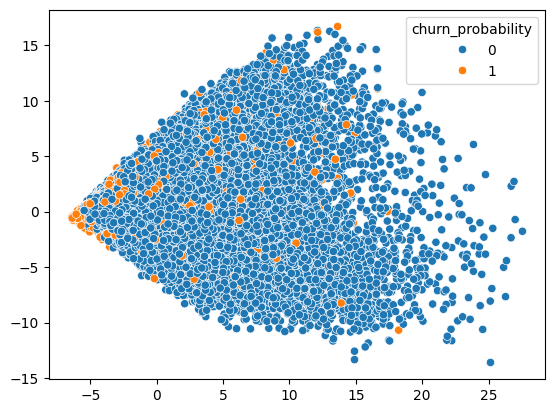

In [66]:
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train)

<Axes: >

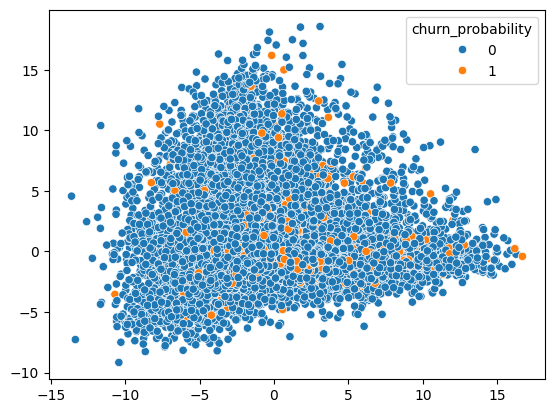

In [67]:
sns.scatterplot(x=X_train_pca[:,1], y=X_train_pca[:,2], hue=y_train)

<BarContainer object of 127 artists>

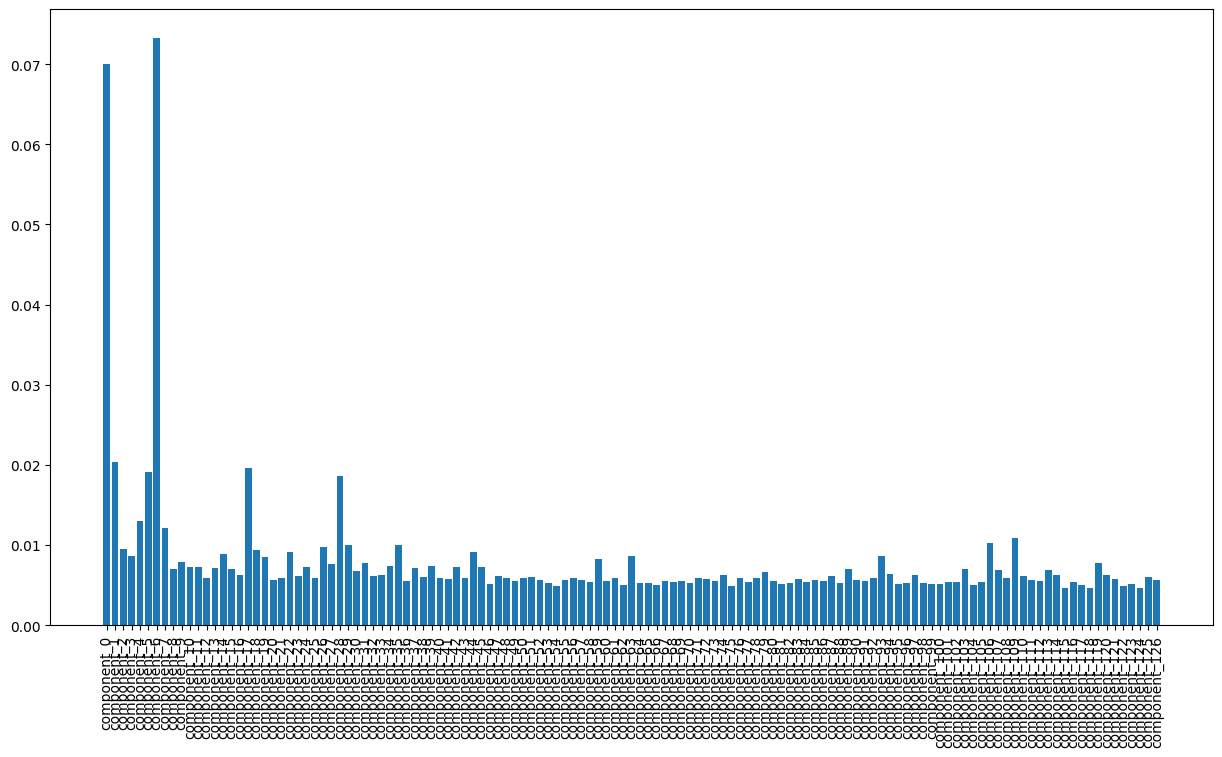

In [68]:
rf_dr = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_dr.fit(X_train_pca, y_train)

feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(127)], 
                                    'importance':rf_dr.feature_importances_})

plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.bar(feature_importances['col'], feature_importances['importance'])

PCA has selected, 14 Columns will describe the 90% of the information about the dataset out of 128 Columns, which is great in dimentionality reduction.

In [69]:
# Let's transform the same to the X_test data as well.
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(21000, 127)

In [70]:
pca.explained_variance_ratio_

array([1.59506782e-01, 8.59113002e-02, 5.42750923e-02, 4.56251480e-02,
       3.76097537e-02, 2.91954834e-02, 2.83217437e-02, 2.54887054e-02,
       2.41805033e-02, 2.32878539e-02, 2.07510879e-02, 2.06329633e-02,
       1.85202074e-02, 1.70912272e-02, 1.62843395e-02, 1.48617107e-02,
       1.35349498e-02, 1.28670131e-02, 1.20922988e-02, 1.16756566e-02,
       1.12821248e-02, 1.10920087e-02, 1.09606715e-02, 1.01133483e-02,
       9.38474418e-03, 9.32472631e-03, 8.88293050e-03, 8.50218472e-03,
       8.09321570e-03, 7.52955167e-03, 7.51044972e-03, 7.33069303e-03,
       6.92635415e-03, 6.74231711e-03, 6.72014711e-03, 6.23011852e-03,
       5.92490362e-03, 5.88915162e-03, 5.82435657e-03, 5.59514228e-03,
       5.45561748e-03, 5.29845164e-03, 5.19810520e-03, 5.04456436e-03,
       4.94663341e-03, 4.79337157e-03, 4.68580082e-03, 4.54588781e-03,
       4.48319492e-03, 4.45115203e-03, 4.40605214e-03, 4.33685710e-03,
       4.27550602e-03, 3.99081702e-03, 3.94140516e-03, 3.73038734e-03,
      

# Model Building

## Using Logistic Regression

In [251]:
# Let's Construct the simple Logistic Regression model first and check the accuracy.
logistic_model_sim = LogisticRegression()
model = logistic_model_sim.fit(X_train_pca[:, :45], y_train)

In [252]:
y_test_pred = model.predict(X_test_pca[:, :45])

In [253]:
def print_model_report(y_test, y_test_pred):
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print("Model Accuracy is: {}".format(accuracy_score(y_test, y_test_pred)))
    print("Precision Score: {}".format(precision_score(y_test, y_test_pred)))
    print("Recall score: {}".format(recall_score(y_test, y_test_pred)))

In [254]:
print_model_report(y_test=y_test, y_test_pred=y_test_pred)

Confusion Matrix:
[[18549   330]
 [ 1388   733]]
Model Accuracy is: 0.9181904761904762
Precision Score: 0.6895578551269991
Recall score: 0.34559170202734557


*Confusion Matrix Breakdown*
- Out of 18879 NOT Churn case the model has predicted 18719 data as correctly classified.
- Out of 2121 Churn case the model has preducted 205 data are correctly classified.
- For Business requirement, Predicting Not Chrun data as Churn will not impact the business, but pridicting Chrun customer as NOT Churn will impact the business.

Model Improvement:
- For our case study, we have to increase the value of Recall.

## Using SVM

In [119]:
svm_model_sim = SVC(C = 10, kernel='rbf', gamma=0.1)

In [120]:
svm_model_sim.fit(X_train_pca[:, :35], y_train)

SVC(C=10, gamma=0.1)

In [121]:
y_test_pred_svm = svm_model_sim.predict(X_test_pca[:, :35])

In [122]:
print_model_report(y_test=y_test, y_test_pred=y_test_pred_svm)

Confusion Matrix:
[[18383   496]
 [ 1293   828]]
Model Accuracy is: 0.9148095238095239
Precision Score: 0.6253776435045317
Recall score: 0.39038189533239037


## Using Decision Tree

In [131]:
# Initialize the Decision Tree with random max_depth value of 8
dt_model_sim = DecisionTreeClassifier(random_state=40, max_depth=8)

In [132]:
# Fit the DT model
dt_model_sim.fit(X_train_pca[:, :35], y_train)

DecisionTreeClassifier(max_depth=8, random_state=40)

In [133]:
# Predict the test values using DT Model
y_test_pred_dt = dt_model_sim.predict(X_test_pca[:, :35])

In [134]:
print_model_report(y_test=y_test, y_test_pred=y_test_pred_dt)

Confusion Matrix:
[[18287   592]
 [ 1179   942]]
Model Accuracy is: 0.9156666666666666
Precision Score: 0.6140808344198174
Recall score: 0.44413012729844414


*Model Accuracy Breakdown:*

Now, we have some improvement in Recall score using decision tree model when compare to the logistic regression.
and model total accuracy remains same.

## Using Random Forest

In [139]:
# Initialize the Rondom Forest Classifier with some random values for parameters.
rf_model_sim = RandomForestClassifier(n_estimators=10, max_depth=8, max_features=5, random_state=40, oob_score=True)

In [140]:
# Fit the model to the dataset.
rf_model_sim.fit(X_train_pca[:, :35], y_train)

RandomForestClassifier(max_depth=8, max_features=5, n_estimators=10,
                       oob_score=True, random_state=40)

In [141]:
rf_model_sim.estimators_[4]

DecisionTreeClassifier(max_depth=8, max_features=5, random_state=1239247864)

In [143]:
# Predict the values for the test data
y_test_pred_rf = rf_model_sim.predict(X_test_pca[:, :35])

In [144]:
print_model_report(y_test=y_test, y_test_pred=y_test_pred_rf)

Confusion Matrix:
[[18757   122]
 [ 1741   380]]
Model Accuracy is: 0.9112857142857143
Precision Score: 0.7569721115537849
Recall score: 0.17916077322017915


Here we got the same accuracy and slight change in the Recall value.

And all this model are basic and randomly set the parameter values. let's get more accuracy by tuning some parameter of the model.

## Using AdaBoosting

In [148]:
# Initialize the AdaBoost classifier model
adaboost_model_sim = AdaBoostClassifier(n_estimators=200, random_state=50)

In [149]:
adaboost_model_sim.fit(X_train_pca[:,:35], y_train)

AdaBoostClassifier(n_estimators=200, random_state=50)

In [150]:
y_test_pred_adaboost = adaboost_model_sim.predict(X_test_pca[:, :35])

In [151]:
print_model_report(y_test=y_test, y_test_pred=y_test_pred_adaboost)

Confusion Matrix:
[[18426   453]
 [ 1275   846]]
Model Accuracy is: 0.9177142857142857
Precision Score: 0.651270207852194
Recall score: 0.3988684582743989


# Hyperparameter Tuning

## Hyperparameter tuning for Logistic Regression

In [176]:
# Initialize the logistic regression model
logistic_model = LogisticRegression()

In [177]:
params = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    'penalty': ['l1','l2'],
    'C': [100, 10, 1.0, 0.1, 0.01, 0.001]
}

In [178]:
logistic_grid_search = GridSearchCV(estimator=logistic_model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring="accuracy")

In [179]:
logistic_grid_search.fit(X_train_pca[:, :100], y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             scoring='accuracy', verbose=1)

In [180]:
logistic_score_df = pd.DataFrame(logistic_grid_search.cv_results_)
logistic_score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.068960,0.016607,0.000000,0.000000,100,l1,newton-cg,"{'C': 100, 'penalty': 'l1', 'solver': 'newton-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
1,0.078566,0.024769,0.000000,0.000000,100,l1,lbfgs,"{'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
2,5.454908,0.971772,0.017723,0.009624,100,l1,liblinear,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.919694,0.916633,0.91898,0.917041,0.922135,0.918896,0.001985,2
3,0.073932,0.019022,0.000000,0.000000,100,l1,sag,"{'C': 100, 'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
4,3.668860,0.677626,0.004501,0.002990,100,l2,newton-cg,"{'C': 100, 'penalty': 'l2', 'solver': 'newton-...",0.919694,0.916633,0.91898,0.917041,0.922135,0.918896,0.001985,2


In [181]:
logistic_best_model = logistic_grid_search.best_estimator_

In [182]:
y_test_pred_logistic_best = logistic_best_model.predict(X_test_pca[:, :100])

In [183]:
print_model_report(y_test=y_test, y_test_pred=y_test_pred_logistic_best)

Confusion Matrix:
[[18530   349]
 [ 1323   798]]
Model Accuracy is: 0.9203809523809524
Precision Score: 0.6957279860505667
Recall score: 0.37623762376237624


## Hyperparameter tuning for Decision Tree

We are going to use Grid Search CV method for hyper parameter tuning.

In [ ]:
# Initialize the Decision Tree
dt_model = DecisionTreeClassifier(random_state=40)

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 8, 10],
    'min_samples_leaf': [5, 10, 20, 40, 50]
}

In [ ]:
# Instantiate the grid search model
dt_grid_search = GridSearchCV(estimator=dt_model, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "recall")

In [ ]:
%%time
dt_grid_search.fit(X_train_pca, y_train)

In [ ]:
dt_score_df = pd.DataFrame(dt_grid_search.cv_results_)
dt_score_df.head()

In [ ]:
dt_best_model = dt_grid_search.best_estimator_

In [ ]:
dt_best_model

In [ ]:
y_test_pred_dt_best = dt_best_model.predict(X_test_pca)

In [ ]:
print_model_report(y_test=y_test, y_test_pred=y_test_pred_dt_best)

## Hyperparameter tuning for Random Forest

In [ ]:
# Initialize the Random Forest
rf_model = RandomForestClassifier(random_state=40, n_jobs=-1)

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50]
}

In [ ]:
# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=params, 
                          cv=3, n_jobs=-1, verbose=1, scoring = "recall")

In [ ]:
%%time
rf_grid_search.fit(X_train_pca,y_train)

In [ ]:
rf_grid_search.best_estimator_

In [ ]:
rf_best_model = rf_grid_search.best_estimator_

In [ ]:
y_test_pred_rf_best = rf_best_model.predict(X_test_pca)

In [ ]:
print_model_report(y_test=y_test, y_test_pred=y_test_pred_rf_best)

Now, we have some decent increment in the Recall value.

In [ ]:
rf_best_model.feature_importances_

# Creating Submission file

In [101]:
unseen.shape

(30000, 171)

In [102]:
unseen.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [103]:
unseen['last_rech_6'] = pd.DatetimeIndex(data=unseen['date_of_last_rech_6']).day
unseen['last_rech_7'] = pd.DatetimeIndex(data=unseen['date_of_last_rech_7']).day
unseen['last_rech_8'] = pd.DatetimeIndex(data=unseen['date_of_last_rech_8']).day

In [104]:
unseen.drop(columns=['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis='columns', inplace=True)
unseen.drop(columns=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], axis='columns', inplace=True)
unseen.drop(columns=['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis='columns', inplace=True)
col_val_1 = unseen.nunique().sort_values(ascending=True)[unseen.nunique().sort_values(ascending=True) == 1].index
unseen.drop(columns=col_val_1, axis='columns', inplace=True)
col_more_50_null_val = round(unseen.isnull().sum().sort_values(ascending=False)/len(unseen.index)*100,2)[round(unseen.isnull().sum().sort_values(ascending=False)/len(unseen.index)*100,2) > 50.0].index
unseen.drop(col_more_50_null_val, axis='columns', inplace=True)

In [105]:
unseen.shape

(30000, 128)

In [106]:
# Pick the columns having more than 0 null values, those columns have to replace with some values using MICE method.
col_more_null_val = round(unseen.isnull().sum().sort_values(ascending=False)/len(unseen.index)*100,2)[round(unseen.isnull().sum().sort_values(ascending=False)/len(unseen.index)*100,2) > 0.0].index
col_more_null_val

Index(['loc_og_mou_8', 'roam_og_mou_8', 'std_ic_t2t_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2f_mou_8', 'loc_ic_t2m_mou_8', 'std_og_mou_8', 'loc_ic_mou_8',
       'loc_og_t2c_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8',
       'isd_og_mou_8', 'loc_og_t2m_mou_8', 'spl_og_mou_8', 'std_ic_t2f_mou_8',
       'loc_og_t2t_mou_8', 'og_others_8', 'offnet_mou_8', 'ic_others_8',
       'loc_ic_t2t_mou_8', 'spl_ic_mou_8', 'onnet_mou_8', 'std_ic_mou_8',
       'std_og_t2m_mou_8', 'isd_ic_mou_8', 'roam_ic_mou_8', 'loc_ic_t2f_mou_8',
       'isd_ic_mou_7', 'og_others_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'loc_ic_t2t_mou_7', 'std_og_mou_7', 'spl_og_mou_7', 'std_ic_t2t_mou_7',
       'std_og_t2f_mou_7', 'isd_og_mou_7', 'spl_ic_mou_7', 'std_og_t2m_mou_7',
       'std_ic_t2f_mou_7', 'ic_others_7', 'onnet_mou_7', 'offnet_mou_7',
       'std_ic_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'std_og_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_

In [107]:
df_null_test = unseen.loc[:, col_more_null_val]
df_null_test = df_null_test[['std_og_t2f_mou_8', 'loc_og_mou_8', 'isd_ic_mou_8', 'loc_og_t2c_mou_8',
       'loc_ic_t2t_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_mou_8',
       'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8',
       'roam_og_mou_8', 'std_ic_t2t_mou_8', 'roam_ic_mou_8',
       'std_og_t2m_mou_8', 'std_ic_t2m_mou_8', 'offnet_mou_8', 'isd_og_mou_8',
       'std_ic_t2f_mou_8', 'onnet_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'ic_others_8', 'og_others_8', 'spl_og_mou_6', 'isd_og_mou_6',
       'og_others_6', 'loc_ic_mou_6', 'ic_others_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'loc_ic_t2f_mou_6', 'std_og_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'spl_ic_mou_6', 'loc_og_t2f_mou_6', 'roam_og_mou_6',
       'loc_og_t2c_mou_6', 'roam_ic_mou_6', 'loc_og_t2t_mou_6', 'offnet_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'onnet_mou_6',
       'std_ic_t2f_mou_7', 'offnet_mou_7', 'loc_ic_mou_7', 'std_ic_t2m_mou_7',
       'roam_ic_mou_7', 'onnet_mou_7', 'std_ic_mou_7', 'std_ic_t2t_mou_7',
       'roam_og_mou_7', 'ic_others_7', 'std_og_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2t_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_t2m_mou_7',
       'loc_og_t2f_mou_7', 'loc_ic_t2t_mou_7', 'loc_og_t2c_mou_7',
       'isd_ic_mou_7', 'loc_og_mou_7', 'og_others_7', 'std_og_t2t_mou_7',
       'spl_og_mou_7', 'std_og_t2m_mou_7', 'isd_og_mou_7', 'std_og_t2f_mou_7',
       'spl_ic_mou_7', 'last_rech_8', 'last_rech_7', 'last_rech_6']]
df_null_test.shape

(30000, 84)

In [108]:
df_null_imputed_test = imputer.transform(df_null_test)

In [109]:
# Assign the computed value to respective columns
unseen.loc[:, col_more_null_val] = df_null_imputed_test


In [110]:
unseen.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,last_rech_6,last_rech_7,last_rech_8
0,69999,91.882,65.330,64.445,0.0,43.01,0.00,7.68,6.90,26.43,...,0,0,0,1692,0.00,0.00,0.00,21.0,26.0,24.0
1,70000,414.168,515.568,360.868,0.0,549.86,0.00,23.76,0.00,17.68,...,0,0,0,2533,0.00,0.00,0.00,19.0,16.0,24.0
2,70001,329.844,434.884,746.239,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,277,525.61,758.41,241.84,29.0,27.0,28.0
3,70002,43.550,171.390,24.400,0.0,8.26,0.00,96.53,0.00,0.00,...,0,0,0,1244,0.00,0.00,0.00,25.0,30.0,24.0
4,70003,306.854,406.289,413.329,0.0,2.84,1.61,629.43,450.48,63.18,...,0,0,0,462,0.00,0.00,0.00,29.0,29.0,30.0


In [111]:
sub_unseen = unseen.set_index("id")
sub_unseen.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,last_rech_6,last_rech_7,last_rech_8
id,,,,,,,,,,,,,,,,,,,,,
69999,91.882,65.330,64.445,0.0,43.01,0.00,7.68,6.90,26.43,10.89,...,0,0,0,1692,0.00,0.00,0.00,21.0,26.0,24.0
70000,414.168,515.568,360.868,0.0,549.86,0.00,23.76,0.00,17.68,598.08,...,0,0,0,2533,0.00,0.00,0.00,19.0,16.0,24.0
70001,329.844,434.884,746.239,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,277,525.61,758.41,241.84,29.0,27.0,28.0
70002,43.550,171.390,24.400,0.0,8.26,0.00,96.53,0.00,0.00,98.61,...,0,0,0,1244,0.00,0.00,0.00,25.0,30.0,24.0
70003,306.854,406.289,413.329,0.0,2.84,1.61,629.43,450.48,63.18,2.66,...,0,0,0,462,0.00,0.00,0.00,29.0,29.0,30.0


In [112]:
unsceen_scaled = scalar.transform(sub_unseen)

In [113]:
test_pca = pca.transform(unsceen_scaled)
test_pca.shape

(30000, 127)

In [255]:
unseen['churn_probability'] = model.predict(test_pca[: ,:45])

In [256]:
submit_data = unseen[['id','churn_probability']]
submit_data.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [258]:
submit_data['churn_probability'].value_counts()

0    29020
1      980
Name: churn_probability, dtype: int64

Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.

In [233]:
submit_data.to_csv('submission.csv',index=False)